# Wine Quality Linear Regression Lab

### This is a lab on Linear Regression using a wine quality dataset:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## We will begin with a quick review of linear regression

![S A T vs College GPA](linear-regression-gpa.png)

https://www.theanalysisfactor.com/linear-regression-outcome-boundaries/

![Linear Regression example plot](800px-Linear_least_squares_example2_smallest_size.png)

https://en.wikipedia.org/wiki/Linear_regression

### Now we will import the wine quality data

In [166]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns # plotting library which is built on matplotlib

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # this is a method not a class, hence lower case name

### The data is included in this repository in the Data folder.

There are two datasets: white and red wine.  
There are 1,599 records for the red wines, and 4,898 for the white.  
We are interested in the quality (taste) of the wine here.  
As white and red wine have different tastes we cannot combine the two datasets.  
We will start off with just the red wines.

In [203]:
red_wine_df = pd.read_csv('Data/winequality-red.csv', sep=';') # Note the ".csv" file is not comma separated!

In [204]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### We will now review the data science process.

![The Data Science Process graphic](data-science-process_Blitzstein_medium_size.jpg)

https://www.kdnuggets.com/2016/03/data-science-process-rediscovered.html

### 1. What would be possible uses of creating a model to predict wine quality (taste)?   

<details>
<summary>A:</summary>
    
- ##### Reduce the amount of taste testing required. For example, instead of 3 taste testers, just use one if it matches the predicted quality.
    
- ##### Improve the quality of the wine by adjusting the manufacturing process to improve chemical properties associated with good taste.  
- ##### Potentially identify and sell to "niche" markets by using wine tasting to identify the preferences of different types of wine consumers and map them to the underlying chemical properties. This would allow wines to be sold directly to consumers who liked the taste of that particular wine.
</details>

### 2. How would we get the data?

- API e.g. download from Twitter
- Web Scraping e.g. get airline prices for flights from their web sites.
- From a database e.g. using a SQL query
- Or, as in this case, in a file e.g. comma separated value file.

### 3. Exploratory Data Analysis - which we will do next.

### 4. Model the data - we will use linear regression.

### 5. Finally we will look at how well the model performs on data it has not "seen" before.

## We will now do some Exploratory Data Analysis (EDA)

We should check if the dataypes seem correct.  
For example are there strings where we would expect integers or floats.  
Also check for the existence of nulls, and examine outliers etc.  
(Nulls sometimes indicate an error in the data collection process. 
They may make using a machine learning algorithm more difficult.)  
Finally do some plots to see how the data looks.

In [205]:
red_wine_df.shape # rows and columns: (1599, 12)

(1599, 12)

In [206]:
red_wine_df.info() 
# There appear to be no nulls in the red wine dataset
# All the data types seem to be correct/as expected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [207]:
red_wine_df.describe()
# Note that, although the quality score has a range of zero to 10, in this dataset the max is 8, and the min is 3.
# The Min and Max values do not indicate any outliers that are clearly incorrect ("impossible"), 
# for example, negative values for values that should always be positive.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## This is the end of the setup, and the start of the lab itself.

##### Now we will examine how the variables are correlated against quality.

To correlate the entire DataFrame against quality:  
    `red_wine_df.corrwith(red_wine_df['quality'])`

In [210]:
red_corr_matrix_quality = red_wine_df.corrwith(red_wine_df['quality']) # Correlate the entire DataFrame against quality.
type(red_corr_matrix_quality) # pandas.core.series.Series
red_corr_matrix_quality

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64

In [ ]:
red_corr_matrix_quality_df = pd.DataFrame(red_corr_matrix_quality) # Convert the Series to a DataFrame to use in the sns.heatmap
red_corr_matrix_quality_df

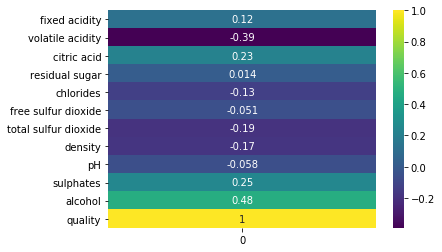

In [212]:
sns.heatmap(red_corr_matrix_quality_df, annot=True, cmap='viridis')

##### Here we will plot the feature with the highest correlation to quality against quality

    red_wine_df.plot.scatter(x='alcohol', y='quality')

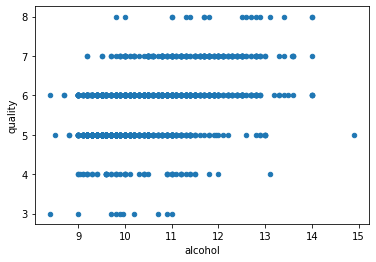

In [209]:
red_wine_df.plot.scatter(x='alcohol', y='quality')

##### Now we will use machine learning, specifically Linear Regression, to create a model predicting quality based on other features, such as alcohol content

We need to split the data into training and test splits so we can test how well it will predict values for data it has not "seen".

Use Train Test Split for this:  
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
Initially use Linear Regression with just one variable, the one with the highest correlation to Quality.
Look at the R Squared scores for training and test data.
Then plot this line over the data.

Finally do Linear Regression using all the variables to predict Quality.
Again calculate R^2 for both training and test data.
Compare these to the results with just one feature.


In [129]:
X_alcohol = red_wine_df[['alcohol']]
# double square brackets give a DataFrame which is expected as the first parameter X, not a pandas Series, 
# for the Linear Regression fit method.

In [130]:
y = red_wine_df['quality']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_alcohol, y, test_size=0.33, random_state=42)

In [133]:
linear_regression_model_train_test = LinearRegression()

In [135]:
linear_regression_model_train_test.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
linear_regression_model_train_test.score(X_train, y_train) # R squared = 0.24967855031277852

0.24967855031277852

In [137]:
linear_regression_model_train_test.score(X_test, y_test) # R^2 = 0.17781904412463334 
# This is significantly worse than the training result, that it suggests overfitting.

0.17781904412463334

In [139]:
intercept_train_test =  linear_regression_model_train_test.intercept_
intercept_train_test

1.6865918943342435

In [140]:
slope_train_test = linear_regression_model_train_test.coef_[0] 
slope_train_test

0.3778371521572095

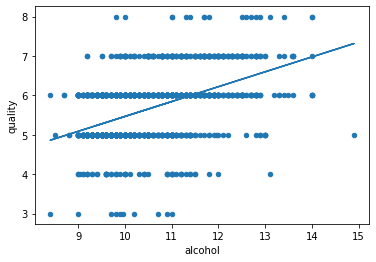

In [141]:
red_wine_df.plot.scatter(x='alcohol', y='quality')
plt.plot(red_wine_df['alcohol'], (red_wine_df['alcohol'] * slope_train_test) +  intercept_train_test)

##### Now we will do linear regression with all the features

In [145]:
X_all = red_wine_df.drop('quality', axis='columns')
X_all.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.33, random_state=42)

In [147]:
linear_regression_model_all = LinearRegression()

In [148]:
linear_regression_model_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
linear_regression_model_all.score(X_train, y_train) # R^2 = 0.35632971309091954 vs 0.24967855031277852 for just alcohol i.e. better

0.35632971309091954

In [150]:
linear_regression_model_all.score(X_test, y_test) 
# R^2 = 0.35944431072490646 vs 0.17781904412463334 for just alcohol i.e. much better, plus no over fitting.

0.35944431072490646

### What are the advantages and disadvantages of using linear regression for predicting discrete valued output?   

<details>
<summary>A:</summary>
    
#### Advantages:  
- ##### Easy to implement and understand.  
- ##### It is easy to use the calculated coefficients to measure the effect each input value has on the output (vs, for example, logistic regression which is a bit more complicated).  

#### Disadvantages:
- ##### Can only be used when the discrete values are ordinal and “equally spaced” i.e. a one unit difference has the same relevance/information across the range of output values. (Couldn't use zip codes, for example.)  
- ##### The output must be modified for predictions e.g. rounding (up or down) to the nearest value.  
- ##### The algorithm can predict values outside the range of allowed discrete values e.g. 0,1 for binary decisions, (it could predict 2).  
- ##### Outliers can negatively affect the location of the decision boundary. In particular, outliers can move the predictions away from the optimal decision boundary. 

</details>
 



### References


Modeling wine preferences by data mining from physicochemical properties
http://www3.dsi.uminho.pt/pcortez/wine5.pdf